<a href="https://colab.research.google.com/github/ttaye165/github-introfall25-ttaye165/blob/main/Final_partB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-1473806340.py:6: DtypeWarning: Columns (100,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("xdmgnd.csv").iloc[:, 1:]


Number of cor >0.6:<bound method Series.sum of IYR         6
IMO         4
IYR2        6
IMO2        4
IYR3        6
           ..
RCL         1
Latitude    6
Longitud    1
SIGNAL      2
MOPERA      4
Length: 92, dtype: int64>


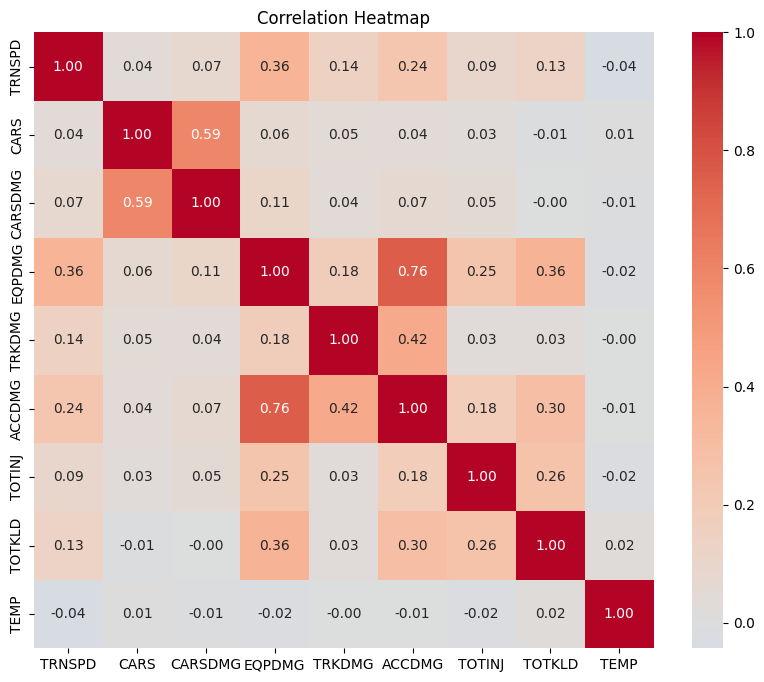

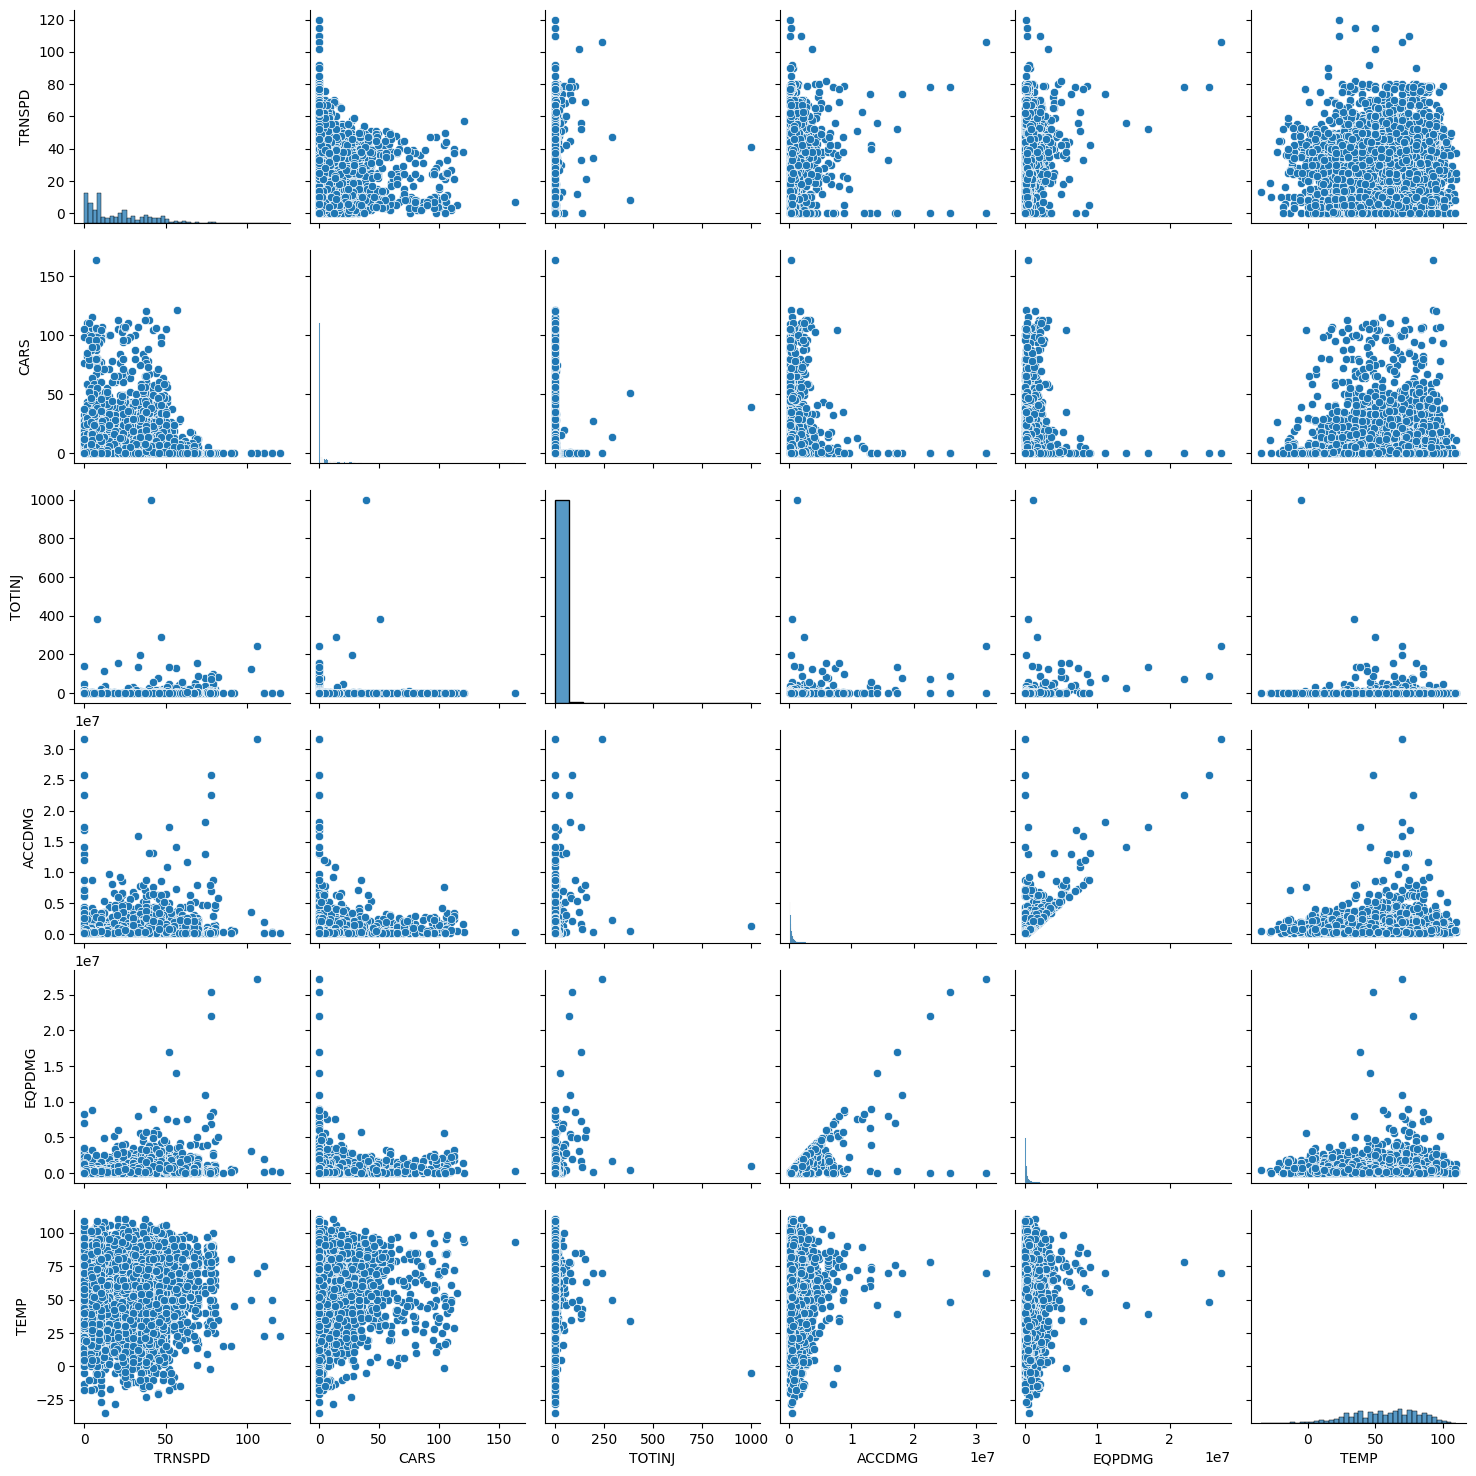

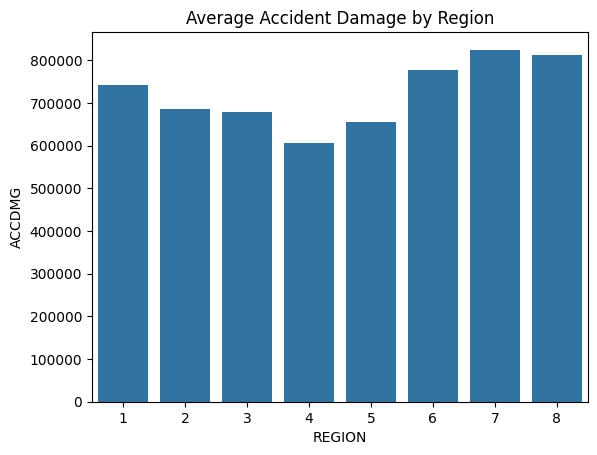

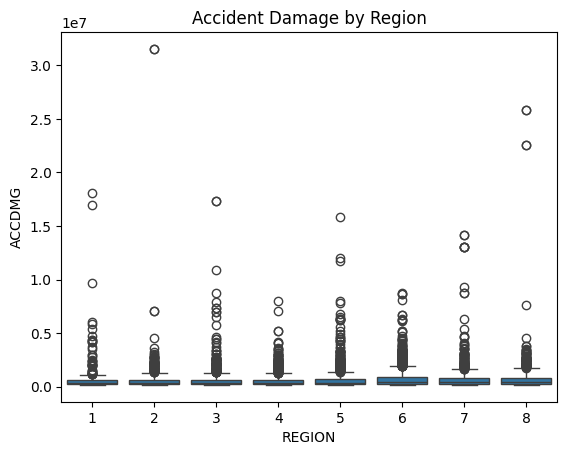

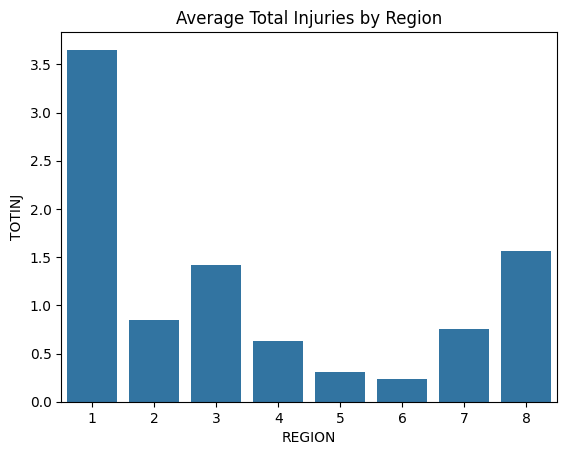

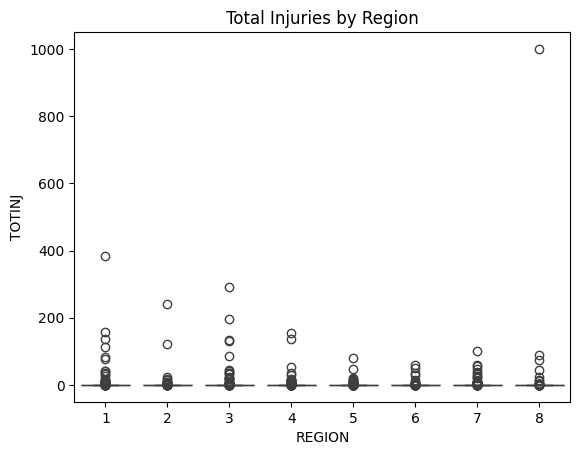

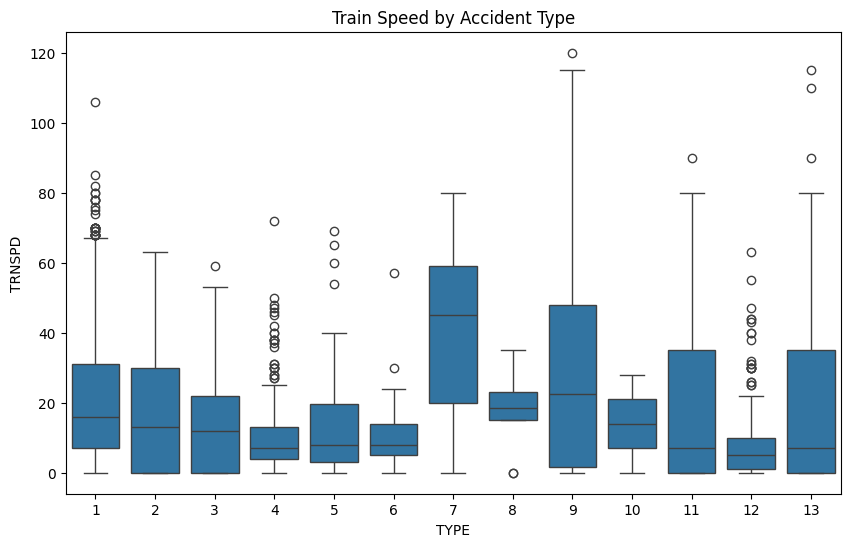

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("xdmgnd.csv").iloc[:, 1:]
num_df = df.select_dtypes(include=np.number)
#print(df)
#correl = num_df.corr()
greater_60 = correl[correl > 0.6]
#print(correl)
print("Number of cor >0.6:"+str(greater_60.count().sum))

#corr map

corr_cols = ['TRNSPD','CARS','CARSDMG','EQPDMG','TRKDMG',
             'ACCDMG','TOTINJ','TOTKLD','TEMP']

corr = df[corr_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()


#Scatterplot Matrix

pair_cols = ['TRNSPD','CARS','TOTINJ','ACCDMG','EQPDMG','TEMP']

sns.pairplot(df[pair_cols], diag_kind="hist")
plt.show()

# Barplots and Boxplots


# ACCDMG by REGION
plt.figure()
sns.barplot(x="REGION", y="ACCDMG", data=df, errorbar=None)
plt.title("Average Accident Damage by Region")
plt.show()

plt.figure()
sns.boxplot(x="REGION", y="ACCDMG", data=df)
plt.title("Accident Damage by Region")
plt.show()

# TOTINJ by REGION
plt.figure()
sns.barplot(x="REGION", y="TOTINJ", data=df, errorbar=None)
plt.title("Average Total Injuries by Region")
plt.show()

plt.figure()
sns.boxplot(x="REGION", y="TOTINJ", data=df)
plt.title("Total Injuries by Region")
plt.show()


# Boxplot of Train Speed by Type

plt.figure(figsize=(10, 6))
sns.boxplot(x="TYPE", y="TRNSPD", data=df)
plt.title("Train Speed by Accident Type")
plt.show()

In [76]:

# Filter to years 2001–2022
df_new = df[(df["IYR"] >= 1) & (df["IYR"] <= 22)]

# Q9: Mean ACCDMG (2001–2022)

mean_accdmg = round(df_new["ACCDMG"].mean(), 2)
print("Mean ACCDMG:", mean_accdmg)

month_counts = df_new.groupby("IMO").size()
most_common_month = month_counts.idxmax()
print("Most common :", most_common_month)

hazmat_count = (df_new["CARSHZD"] > 0).sum()
print("Hazmat acc:", hazmat_count)

monthly_damage = (
    df_new.groupby(["IYR", "IMO"], as_index=False)["ACCDMG"].sum())

max_damage_row = monthly_damage.loc[monthly_damage["ACCDMG"].idxmax()]
print("Highest dama:", int(max_damage_row["IYR"]))
print("Highest dama:", int(max_damage_row["IMO"]))

overall_mean_speed = df_new["TRNSPD"].mean()
type1_mean_speed = df_new[df_new["TYPE"] == 1]["TRNSPD"].mean()

print("Overall:", overall_mean_speed)
print("TYPE 1 mean TRNSPD:", type1_mean_speed)

if type1_mean_speed < overall_mean_speed:
    print("TYPE 1 speed is  lower than ")
elif type1_mean_speed > overall_mean_speed:
    print("TYPE 1 sall mean")
else:
    print("TYPE 1 speed is about the same as overall mean")

injury_month = df_new.groupby("IMO")["TOTINJ"].sum().idxmax()
print("Month with highest total injuries (IMO):", injury_month)

Mean ACCDMG (2001–2022): 715518.87
Most common accident month (IMO): 7
Hazmat accidents: 305
Highest damage year (IYR): 15
Highest damage month (IMO): 5
Overall mean TRNSPD: 20.127729544856617
TYPE 1 mean TRNSPD: 19.895046591466404
TYPE 1 speed is significantly lower than overall mean
Month with highest total injuries (IMO): 1


In [74]:
# ----------------------------------------
# Part 2: Extreme Train Accidents Dataset
# ----------------------------------------


df_new = df[(df["IYR"] >= 1) & (df["IYR"] <= 22)]

mean_accdmg = round(df_new["ACCDMG"].mean(), 2)
print(mean_accdmg)

most_common_month = df_new["IMO"].value_counts().idxmax()
print(most_common_month)

hazmat_count = (df_new["CARSHZD"] > 0).sum()
print(hazmat_count)

monthly_damage = df_new.groupby(["IYR", "IMO"])["ACCDMG"].sum()
max_year_month = monthly_damage.idxmax()
print(max_year_month[0])
print(max_year_month[1])

overall_mean_speed = df_new["TRNSPD"].mean()
type1_mean_speed = df_new[df_new["TYPE"] == 1]["TRNSPD"].mean()
print(overall_mean_speed)
print(type1_mean_speed)

injury_month = df_new.groupby("IMO")["TOTINJ"].sum().idxmax()
print(injury_month)

trk_missing = df["TRKDNSTY"].isna().sum()
print(trk_missing)

narr = df["NARR1"].dropna()
word_counts = narr.str.split().apply(len)
total_words = word_counts.sum()
avg_words = round(word_counts.mean())
print(total_words)
print(avg_words)

tokens = []
for text in narr.str.lower():
    words = text.split()
    tokens.extend([w.strip(".,;:!?()") for w in words])
counter = Counter(tokens)
top20_words = [w for w, _ in counter.most_common(20)]
print(top20_words)
print(counter["derailed"])

derailment_count = (df["TYPE"] == 1).sum()
print(derailment_count)

cols = ["ACCDMG", "TRNSPD", "TONS", "TEMP", "TYPE", "Cause"]
nulls_dropped = df[cols].isna().any(axis=1).sum()
print(nulls_dropped)

df["FATALITY"] = ((df["TOTINJ"] + df["TOTKLD"]) > 0).astype(int)
fatality_count = df["FATALITY"].sum()
print(fatality_count)

print(df["FATALITY"].value_counts())

TP = 9
FP = 8
FN = 11
TN = 42

accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy_percent = round(accuracy * 100)

print("Accuracy (%):", accuracy_percent)

715518.87
7
305
15
5
20.127729544856617
19.895046591466404
1
2311
126450
17
['the', 'train', 'derailed', 'on', 'cars', 'to', 'track', 'was', 'and', 'at', 'a', 'of', 'when', 'main', 'in', 'due', 'traveling', 'into', 'while', 'with']
3224
6117
0
694
FATALITY
0    6908
1     694
Name: count, dtype: int64
Accuracy (%): 73
